<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/11-Data%20Preprocessing/Data_Preparation_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# A fundamental package for linear algebra and multidimensional arrays
import pandas as pd                  

# Data analysis and data manipulating tool
import numpy as np                   

# Library to generate random numbers
import random                        

# Collection is a Python module that implements specialized container datatypes providing 
# Counter is a dict subclass for counting hashable objects
from collections import Counter      
                                     
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# to display up to 500 rows in the output of the jupyter notebook cell
pd.set_option('display.max_rows', 500)


In [34]:
# import training data as pandas dataframe
# the data is in csv - comma separated file. Hence we use the function 'read_csv'
train = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv')

# the below code will print the number of rows and columns
train.shape

(891, 12)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# import test data as pandas dataframe
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_test.csv')

# the below code will print the number of rows and columns
test.shape

# the data has 11 columns and 418 rows in the test set
# one column less because the target variable will not be there in the test set. It is our task to predict the target variable

(418, 11)

In [37]:
# the below code will display the column names along with their data type
# int64 = integer numbers
# float = floating point numbers
# object = text or mixed numeric or non-numeric values

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
train.head((10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
train.iloc[[0]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [40]:
train.iloc[[15]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0,NaN,S


In [41]:
# detect columns with missing values in the training dataset

# isnull().sum() will sum the number of missing values by columns
train_count_of_missval_by_col = (train.isnull().sum())
train_count_of_missval_by_col

# below code will display only the columns with missing values (in absolute number of rows)
train_count_of_missval_by_col[train_count_of_missval_by_col > 0]

# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(train_count_of_missval_by_col[train_count_of_missval_by_col > 0]/train.shape[0])*100


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age         177
Cabin       687
Embarked      2
dtype: int64

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [42]:
train.shape

(891, 12)

In [43]:
train.shape[0]

891

In [44]:
# detect columns with missing values in the test data
# isnull().sum() will sum the number of missing values by columns
test_count_of_missval_by_col = (test.isnull().sum())
test_count_of_missval_by_col

# below code will display only the columns with missing values (in absolute number of rows)
test_count_of_missval_by_col[test_count_of_missval_by_col > 0]

# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(test_count_of_missval_by_col[test_count_of_missval_by_col > 0]/test.shape[0])*100


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age       86
Fare       1
Cabin    327
dtype: int64

Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64

In [45]:
# describe funtion takes all numeric columns and provide descriptive statistics on them
# descriptive statistics include - count of rows, mean, standard deviation, minimum & maximum value, Quartile 25, 50, and 70
# Note: Quartile 50 = median
train.describe()

# from the .dtypes function and also the output of describe above we understand that there are certain columns 
# that are read as numeric in the dataframe. But these columns shouldn't have been so

# Note1: PassengerId is an index column and is irrelevant in our model. This can either be converted into an index or deleted
# Note2: Survived and Pclass are categorical variables but treated as numeric while importing

# transform the Survived and Pclass into categorical variable
train['Survived'] = train['Survived'].astype(str)
train['Pclass'] = train['Pclass'].astype(str)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
!pip install pandasgui

In [ ]:
# pandasgui is a library that will display the data in a gui format
# once you run the code below, there will be a popup window to view and create graphs from the dataframe
# make sure your chrome does not block 'popup window'
from pandasgui import show
gui = show(train)

In [48]:
# value_counts() reveals the unique number of values in a column along with the frequency - let us look at string columns
# value_counts(normalize = True) will express the frequency proportional to the total number of rows (in percentage)
train['Sex'].value_counts()
train['Sex'].value_counts(normalize=True)*100

train['Embarked'].value_counts()
train['Embarked'].value_counts(normalize=True)*100

# interpreting the below results
# Sex - 64.76% of the passengers are male and 35.24% are female
# Embarked - 72.44% of the passengers boarded at S, 18.90% boarded at C, and 8.66% boarded at Q


male      577
female    314
Name: Sex, dtype: int64

male      64.758698
female    35.241302
Name: Sex, dtype: float64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

In [49]:
# number of classes = number of unique values in the target column
# if there are 2 unique value then it is a binary classification (in our case '0' or '1')
# if there are more than 2 unique values then it is multi-class classification

# look at the target variable and understand the proportion - let us look at target variable
# 0 = did not survive
# 1 = survived
train['Survived'].value_counts()
train['Survived'].value_counts(normalize=True)*100

# interpreting the results - 38.38% of the passengers survived and 61.62% of the passengers did not survive

0    549
1    342
Name: Survived, dtype: int64

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [50]:
# Drop irrelevant columns - Ticket and Name (may be passenger ID too - if not set it as index)
del train['Name']
del train['Ticket']
del train['PassengerId']

# Code for using the PassengerId column as index
# train = train.set_index('PassengerId')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [51]:
# Missing value treatment
# missing values - too many missing values - dropping entire column
del train['Cabin']

# missing values in numeric column many not be NaN or blank. It could be zero as well
# for example, the Fare cannot be zero in out dataset. So the missing value in Fare columns are extracted by filtering for zero
# filter for Fare = 0 and display the shape of the dataframe - 15 rows
train[train['Fare'] == 0].shape

# There are only few rows with missing values in Fare - Listwise or dropping entire rows
train = train[train['Fare'] != 0]
# shape of the training data after dropping rows with missing Fare
train.shape

(15, 8)

(876, 8)

In [52]:
# Importing SimpleImputer from sklearn - this will be used to impute data in the cells with missing values
# # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer 

# missing values - numeric - impute with mean in column age
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(train[['Age']])
train['Age'] = mean_imputer.transform(train[['Age']]).ravel()

# missing values - categorical - impute with mode (most frequent)
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(train[['Embarked']])
train['Embarked'] = mode_imputer.transform(train[['Embarked']]).ravel()

# alternative method - missing values - categorical - impute with mode (constant)
const_imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value = 'NA')
const_imputer = const_imputer.fit(train[['Embarked']])
train['Embarked'] = const_imputer.transform(train[['Embarked']]).ravel()

# Export the data to csv file and manually check in Excel how the values have been imputed
# Do this for intuituively understanding how the Imputer works
# You can replace the above strategy with median to check how the results differ
train.to_csv('train_imputed.csv')

# in case you are interested in diving deeper into Mean vs Median method for imputation read the below article
# https://medium.com/analytics-vidhya/feature-engineering-part-1-mean-median-imputation-761043b95379


In [53]:
age_mean= train['Age'].mean()
age_std = train['Age'].std()
ll = age_mean - (3 * age_std)
hh= age_mean +(3 * age_std)

filter_outlier_train= train[(train['Age'] <ll) | (train['Age']>hh)]
filter_outlier_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S


In [54]:
# Determine outlier using the Standard deviation method for fare column

# calcuate the mean of fare
fare_mean = train['Fare'].mean()
# calculate the standard deviation
fare_std = train['Fare'].std()
# Lower limit threshold is Mean - 3* SD
ll = fare_mean - (3 * fare_std)
# Higher limit threshold is Mean + 3* SD
hh = fare_mean + (3 * fare_std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
filt_outliers_train = train[(train['Fare'] < ll) | (train['Fare'] > hh)]
filt_outliers_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
118,0,1,male,24.0,0,1,247.5208,C
258,1,1,female,35.0,0,0,512.3292,C
299,1,1,female,50.0,0,1,247.5208,C


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.00,3,1,21.0750,S
11,1,1,female,58.00,0,0,26.5500,S
15,1,2,female,55.00,0,0,16.0000,S
16,0,3,male,2.00,4,1,29.1250,Q
33,0,2,male,66.00,0,0,10.5000,S
54,0,1,male,65.00,0,1,61.9792,C
78,1,2,male,0.83,0,2,29.0000,S
94,0,3,male,59.00,0,0,7.2500,S
96,0,1,male,71.00,0,0,34.6542,C
116,0,3,male,70.50,0,0,7.7500,Q


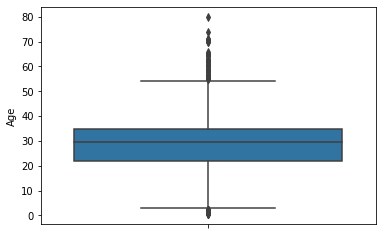

In [55]:
# IQR method for outlier Age
# Calculate Q1, Q2 and IQR
q1 = train['Age'].quantile(0.25)                 
q3 = train['Age'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier_age_train = train[(train['Age'] < q1 - whisker_width*iqr) | (train['Age'] > q3 + whisker_width*iqr)]
outlier_age_train

# boxplot with 1.5 whiskers
sns.boxplot(y='Age', data = train, whis=1.5)

(116, 8)

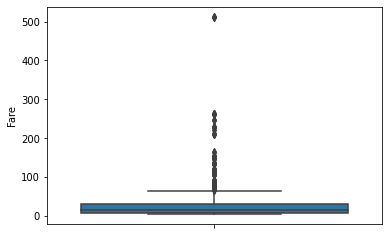

In [56]:
# IQR method for outlier fare
# Calculate Q1, Q2 and IQR
q1 = train['Fare'].quantile(0.25)                 
q3 = train['Fare'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
lower_whisker = q1 - whisker_width*iqr
upper_whisker = q3 + whisker_width*iqr
# Apply filter with respect to IQR, including optional whiskers
outlier_fare_train = train[(train['Fare'] < q1 - whisker_width*iqr) | (train['Fare'] > q3 + whisker_width*iqr)]
outlier_fare_train.shape

# boxplot with 1.5 whiskers
sns.boxplot(y='Fare', data = train, whis=1.5)

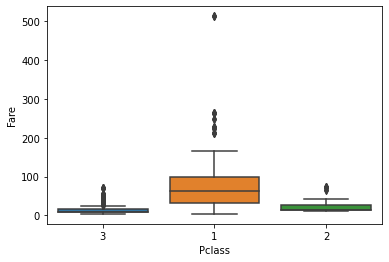

In [57]:
sns.boxplot(x='Pclass', y='Fare', data = train, whis=1.5)

In [58]:
# Outlier treatment
# Top coding - ceiling the uppper limit of the column with the outer whisker value
train.loc[train.Fare>upper_whisker,'Fare'] = upper_whisker

# Bottom / Zero coding - ceiling the lower limit of the column with lower whisker or zero
# It is called Bottom coding when you ceil the lowest value to lower whisker
# It is called zero coding when you ceil the lowest value to zero
# Zero coding should be used for variables which cannot take neagtive values - example, Age cannot be negative

train.loc[train.Fare<0,'Fare'] = 0

# display of minimum and maximum after outlier treatment
train['Fare'].min()
train['Fare'].max()

4.0125

66.3

In [59]:
# Another method for outlier treatment is Binning
# Group the values into certain bins -> e.g Age 0 to 10 in a bin called '0 - 10', etc

# Equal width binning -> width = (max value — min value) / N
age_range = train.Age.max() - train.Age.min()
min_value = int(np.floor(train.Age.min()))
max_value = int(np.ceil(train.Age.max()))
 
# let's round the bin width
# N = number of bins (which is 10 in the below code)
# change the value 10 in the below code to see how the grouping differs
inter_value = int(np.round(age_range/10))
 
min_value, max_value, inter_value

(0, 80, 8)

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]
['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10']


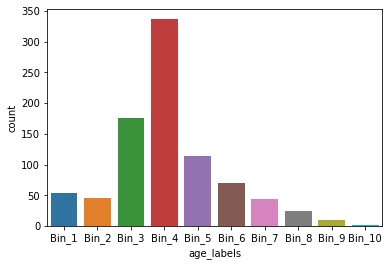

In [60]:
# calculate the intervals
intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
print(intervals)
print(labels)

train['age_labels'] = pd.cut(x = train.Age, bins=intervals, labels=labels, include_lowest=True)
train['age_interval'] = pd.cut(x = train.Age, bins=intervals, include_lowest=True)

# display the bins in graph along with frequency of occurence 
sns.countplot(train.age_labels)

In [61]:
# importing the fraud dataset
fraud_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

In [62]:
# take a look at the data
fraud_data.shape
fraud_data.head()

(59054, 434)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,...,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,debit,181.0,87.0,483.0,NaN,gmail.com,NaN,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,credit,284.0,60.0,NaN,NaN,hotmail.com,hotmail.com,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.0,35.0,54.0,35.0,54.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,credit,441.0,87.0,NaN,371.0,anonymous.com,anonymous.com,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,183599.0,NaN,NaN,6.0,-11.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,15.0,352.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 10.3.3,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,debit,264.0,87.0,10.0,NaN,yahoo.com,NaN,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.0,15.0,405.0,32.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0    57049
1     2005
Name: isFraud, dtype: int64

0    96.604802
1     3.395198
Name: isFraud, dtype: float64

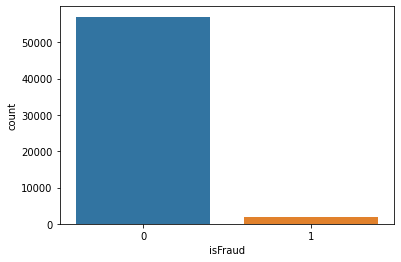

In [63]:
# Taking a look at the target variable
# isFraud = 0 --> normal transaction
# isFraud = 1 --> fraudulent transaction
fraud_data.isFraud.value_counts()
fraud_data.isFraud.value_counts(normalize=True) * 100

# visualize the target variable column
sns.countplot(fraud_data.isFraud)

# interpreting the results - 3.40% of transactions are fraudulent and 99.60% of transactions are normal


In [64]:
# Missing values - To get percentage of missing data in each column
fraud_data.isnull().sum() / len(fraud_data) * 100   

# getting all the numerical columns
num_cols = fraud_data.select_dtypes(include=np.number).columns 
# filling missing values of numerical columns with mean value
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean())   # fills the missing values with mean

# getting all the categorical columns
cat_cols = fraud_data.select_dtypes(include = 'object').columns    

# fills the missing values with maximum occuring element in the column
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.549429
card3              0.267552
card4              0.274325
card5              0.751854
card6              0.269245
addr1             11.392962
addr2             11.392962
dist1             59.865547
dist2             93.443289
P_emaildomain     15.934568
R_emaildomain     76.572290
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.204897
D2                47.336336
D3                44.391574
D4                28.526433
D5                52

In [65]:
# Let's have a look if there still exist any missing values
fraud_data.isnull().sum() / len(fraud_data) * 100

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
card1             0.0
card2             0.0
card3             0.0
card4             0.0
card5             0.0
card6             0.0
addr1             0.0
addr2             0.0
dist1             0.0
dist2             0.0
P_emaildomain     0.0
R_emaildomain     0.0
C1                0.0
C2                0.0
C3                0.0
C4                0.0
C5                0.0
C6                0.0
C7                0.0
C8                0.0
C9                0.0
C10               0.0
C11               0.0
C12               0.0
C13               0.0
C14               0.0
D1                0.0
D2                0.0
D3                0.0
D4                0.0
D5                0.0
D6                0.0
D7                0.0
D8                0.0
D9                0.0
D10               0.0
D11               0.0
D12               0.0
D13               0.0
D14               0.0
D15       

In [66]:
# earlier we have collected all the categorical columns in cat_cols
fraud_data.shape
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)
fraud_data.shape
fraud_data.head()

(59054, 434)

(59054, 1667)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,DeviceInfo_gxq6580_weg_l Build/LMY47I,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_hp2015,DeviceInfo_iOS Device,DeviceInfo_iris 820 Build/MRA58K,DeviceInfo_iris702,DeviceInfo_moto,DeviceInfo_moto x4 Build/NPW26.83-18-2-0-4,DeviceInfo_moto x4 Build/OPW27.57-40,DeviceInfo_moto x4 Build/OPWS27.57-40-6,DeviceInfo_orbis,DeviceInfo_rv:11.0,DeviceInfo_rv:31.0,DeviceInfo_rv:33.0,DeviceInfo_rv:35.0,DeviceInfo_rv:38.0,DeviceInfo_rv:39.0,DeviceInfo_rv:41.0,DeviceInfo_rv:42.0,DeviceInfo_rv:43.0,DeviceInfo_rv:45.0,DeviceInfo_rv:46.0,DeviceInfo_rv:47.0,DeviceInfo_rv:48.0,DeviceInfo_rv:49.0,DeviceInfo_rv:50.0,DeviceInfo_rv:51.0,DeviceInfo_rv:52.0,DeviceInfo_rv:52.9,DeviceInfo_rv:53.0,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,115.655837,215.529442,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,168.784855,28.215689,139.992561,42.073375,70.105107,41.39397,7.791666,0.791666,124.267325,147.2328,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,483.000000,215.529442,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.000000,1.000000,4.000000,4.000000,70.105107,41.39397,145.864171,0.552242,4.000000,4.0000,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,115.655837,215.529442,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.000000,35.000000,54.000000,35.000000,54.000000,35.00000,145.864171,0.552242,0.000000,147.2328,54.000000,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,115.655837,371.000000,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,168.784855,28.215689,139.992561,42.073375,70.105107,41.39397,145.864171,0.552242,124.267325,147.2328,54.019149,18.44513,57.257084,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,10.000000,215.529442,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.000000,15.000000,405.000000,32.000000,70.105107,41.39397,145.864171,0.552242,71.000000,405.0000,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# Separate input features and output feature
# input features
X = fraud_data.drop(columns = ['isFraud'])       

# output feature
Y = fraud_data.isFraud


In [69]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,...,DeviceInfo_gxq6580_weg_l Build/LMY47I,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_hp2015,DeviceInfo_iOS Device,DeviceInfo_iris 820 Build/MRA58K,DeviceInfo_iris702,DeviceInfo_moto,DeviceInfo_moto x4 Build/NPW26.83-18-2-0-4,DeviceInfo_moto x4 Build/OPW27.57-40,DeviceInfo_moto x4 Build/OPWS27.57-40-6,DeviceInfo_orbis,DeviceInfo_rv:11.0,DeviceInfo_rv:31.0,DeviceInfo_rv:33.0,DeviceInfo_rv:35.0,DeviceInfo_rv:38.0,DeviceInfo_rv:39.0,DeviceInfo_rv:41.0,DeviceInfo_rv:42.0,DeviceInfo_rv:43.0,DeviceInfo_rv:45.0,DeviceInfo_rv:46.0,DeviceInfo_rv:47.0,DeviceInfo_rv:48.0,DeviceInfo_rv:49.0,DeviceInfo_rv:50.0,DeviceInfo_rv:51.0,DeviceInfo_rv:52.0,DeviceInfo_rv:52.9,DeviceInfo_rv:53.0,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,1.224253e-16,2.190310e-16,-0.099186,-0.092969,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,0.000000,-7.619398e-17,0.000000,0.000000,-2.810043e-16,2.792120e-16,-1.652719e+00,2.094196e+00,-8.312926e-17,0.000000,-3.458197e-16,0.0,-1.612884e-16,-1.524289e-16,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,67.391508,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,1.582320e+00,2.190310e-16,-0.099186,-0.071893,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.052023,-0.085706,-0.052858,-0.075654,-0.044784,-0.222665,-0.149534,-0.198351,-1.039716,-5.836866e-01,-0.842241,-0.625664,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-7.035279e-01,-1.064971,-3.458197e-16,0.0,-1.612884e-16,-8.579195e-01,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,1.224253e-16,2.190310e-16,-0.099186,-0.078918,-0.034155,-0.041973,-0.214317,-0.113785,-0.026137,-0.052023,-0.266499,-0.052858,-0.087120,-0.019564,-0.230715,-0.149534,-0.255488,-0.892057,1.455011e-01,-0.532577,-0.116237,-3.184610e-01,-2.512549e-01,-1.020618e-15,-1.553743e-14,-7.269267e-01,0.000000,-4.659874e-04,0.0,-1.612884e-16,-5.897637e-01,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,1.224253e-16,1.198129e+00,-0.099186,-0.092969,-0.034155,-0.041973,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,0.000000,-7.619398e-17,0.000000,0.000000,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-8.312926e-17,0.000000,-3.458197e-16,0.0,-1.612884e-16,-1.524289e-16,...,-0.00582,-0.015399,-0.004115,5.41004

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.
 
# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code


In [71]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

# separate minority and majority class
not_fraud = train_data[train_data.isFraud==0]
fraud = train_data[train_data.isFraud==1]


In [72]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
fraud_upsampled = resample(fraud,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fraud), # Match number in majority class
                           random_state=27)


In [73]:
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])


In [74]:
# Now let's check the classes count
upsampled.isFraud.value_counts()

# We can notice here after resampling we have an equal ratio of data points for each class!


1    39942
0    39942
Name: isFraud, dtype: int64

In [75]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes


In [78]:
# fit the sampling
X_train, Y_train = sm.fit_sample(X_train, Y_train)

In [79]:
X_train.head()
Y_train.head()


AttributeError: ignored